# Process Tabular Data with Pandas

## Configuration

This code would normally go in a script automatically run at startup. The user would not have to worry about this.

In [1]:
%run ../beamline_configuration.py

Loading metadata history from /Users/dallan/.config/bluesky/bluesky_history.db


## Quickly access and explore the data

Let's take sample data.

Transient Scan ID: 176     Time: 2018/05/21 00:37:39
Persistent Unique Scan ID: 'b9984a42-3829-480d-b6bc-12efb285a012'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time | motor_slit |   slit_det |          I |
+-----------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


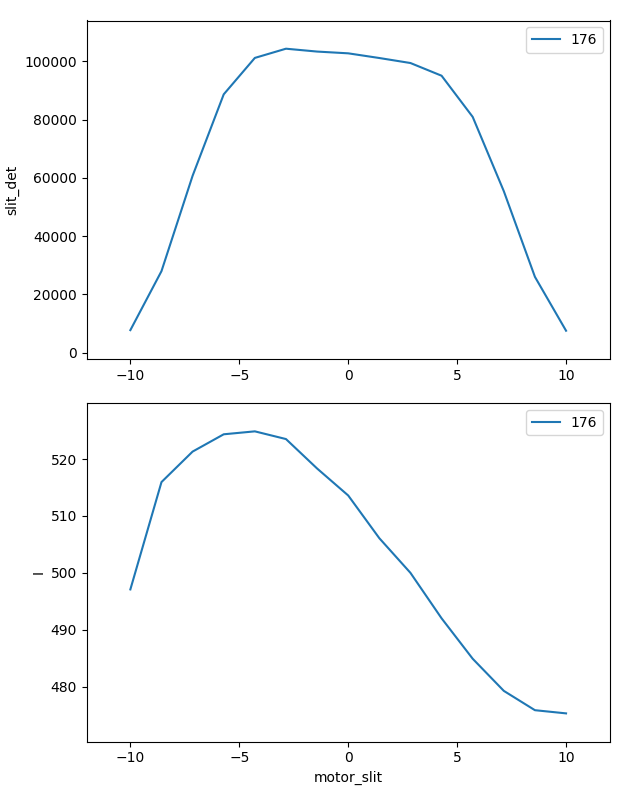

|         1 | 00:37:39.9 |        -10 |       7690 |        497 |
|         2 | 00:37:40.0 |         -9 |      27960 |        516 |
|         3 | 00:37:40.3 |         -7 |      60729 |        521 |
|         4 | 00:37:40.5 |         -6 |      88713 |        524 |
|         5 | 00:37:40.7 |         -4 |     101225 |        525 |
|         6 | 00:37:40.8 |         -3 |     104390 |        524 |
|         7 | 00:37:41.1 |         -1 |     103406 |        518 |
|         8 | 00:37:41.2 |          0 |     102800 |        514 |
|         9 | 00:37:41.4 |          1 |     101189 |        506 |
|        10 | 00:37:41.6 |          3 |      99469 |        500 |
|        11 | 00:37:41.8 |          4 |      95108 |        492 |
|        12 | 00:37:42.0 |          6 |      80959 |        485 |
|        13 | 00:37:42.2 |          7 |      55432 |        479 |
|        14 | 00:37:42.4 |          9 |      25993 |        476 |
|        15 | 00:37:42.7 |         10 |       7486 |        475 |
+---------

('b9984a42-3829-480d-b6bc-12efb285a012',)

In [2]:
RE(scan([slit, I], motor_slit, -10, 10, 15))

Previously we used the syntax ``db(...)`` to search for Headers. We looped through each Header and extracted some of the metadata encapsulated in it. We use the shorthand ``db[-N]`` to retrieve exactly _one_ header, the one corresponding to ``N`` runs ago. 

In [3]:
header = db[-1]  # Header for the most recent one (i.e. 1 run ago)

We can access the data as a table. This object is called a ``pandas.DataFrame``, a high-performance, spreadsheet-like object in Python.

In [4]:
data = header.table()

It display prettily, truncating if needed.

In [5]:
data

,time,motor_slit,slit_det,I
seq_num,,,,
1,2018-05-21 00:37:39.926195000,-10.000000,7690.0,497.080829
2,2018-05-21 00:37:40.090464000,-8.571429,27960.0,515.959465
3,2018-05-21 00:37:40.300663000,-7.142857,60729.0,521.321665
4,2018-05-21 00:37:40.502109999,-5.714286,88713.0,524.363383
5,2018-05-21 00:37:40.712281000,-4.285714,101225.0,524.879435
6,2018-05-21 00:37:40.888790000,-2.857143,104390.0,523.524906
7,2018-05-21 00:37:41.103395000,-1.428571,103406.0,518.348062
8,2018-05-21 00:37:41.287109000,0.000000,102800.0,513.601301
9,2018-05-21 00:37:41.488361000,1.428571,101189.0,506.087367


For large tables, it's handy to know how to ask for just the first or last couple rows.

It is easy to visualize.

<IPython.core.display.Javascript object>


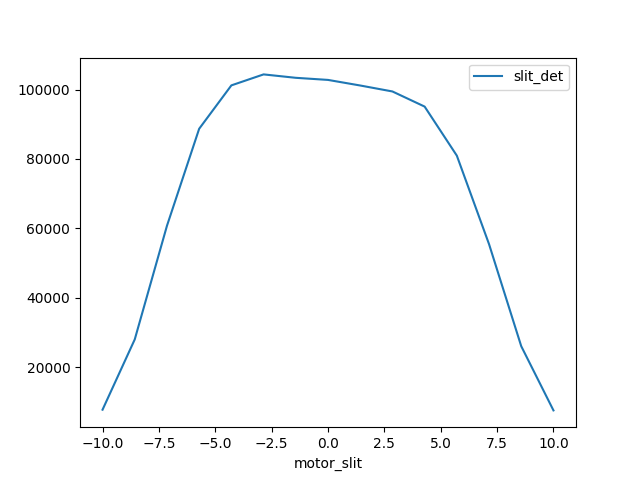

In [6]:
data.plot(x='motor_slit', y='slit_det')

In [8]:
data.head()

,time,motor_slit,slit_det,I
seq_num,,,,
1,2018-05-21 00:37:39.926195000,-10.000000,7690.0,497.080829
2,2018-05-21 00:37:40.090464000,-8.571429,27960.0,515.959465
3,2018-05-21 00:37:40.300663000,-7.142857,60729.0,521.321665
4,2018-05-21 00:37:40.502109999,-5.714286,88713.0,524.363383
5,2018-05-21 00:37:40.712281000,-4.285714,101225.0,524.879435


In [9]:
data.tail()

,time,motor_slit,slit_det,I
seq_num,,,,
11,2018-05-21 00:37:41.875783,4.285714,95108.0,491.999672
12,2018-05-21 00:37:42.084936,5.714286,80959.0,484.886517
13,2018-05-21 00:37:42.287973,7.142857,55432.0,479.238127
14,2018-05-21 00:37:42.494293,8.571429,25993.0,475.839108
15,2018-05-21 00:37:42.754278,10.000000,7486.0,475.279650


Statistics on columns are simple to compute.

In [10]:
data.mean()

motor_slit    4.736952e-16
slit_det      7.083660e+04
I             5.034935e+02
dtype: float64

In [11]:
data.min()

time          2018-05-21 00:37:39.926195
motor_slit                           -10
slit_det                            7486
I                                 475.28
dtype: object

Or just ask for all the common stats at once:

In [12]:
data.describe()

,motor_slit,slit_det,I
count,1.500000e+01,15.000000,15.000000
mean,4.736952e-16,70836.600000,503.493477
std,6.388766e+00,36910.635782,18.473496
min,-1.000000e+01,7486.000000,475.279650
25%,-5.000000e+00,41696.000000,488.443095
50%,0.000000e+00,88713.000000,506.087367
75%,5.000000e+00,101207.000000,519.834863
max,1.000000e+01,104390.000000,524.879435


## Do analysis, and plot

### Normalize by beam current

We can do math on the columns, and we can add new columns.

In [13]:
data['normalized'] = data['slit_det'] / data['I'] * data['I'].mean()

We can plot them conveniently, addressing the columns by name.

<IPython.core.display.Javascript object>


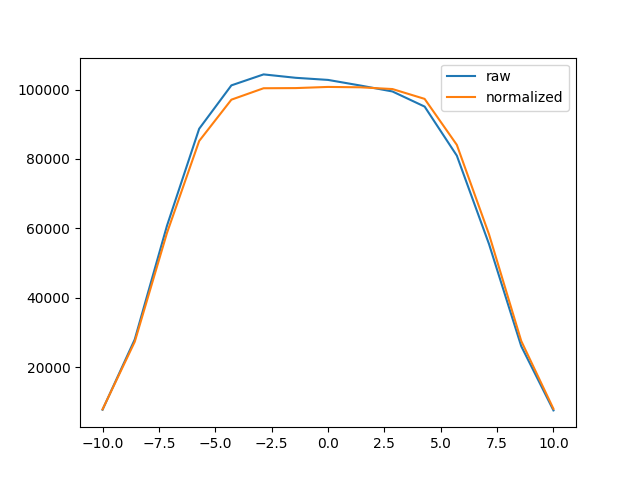

In [14]:
plt.figure()
plt.plot('motor_slit', 'slit_det', data=data, label='raw')
plt.plot('motor_slit', 'normalized', data=data, label='normalized')
plt.legend()

### Select rows with high beam current

Select rows where the current is above `500`.

In [15]:
data[data['I'] > 500]

,time,motor_slit,slit_det,I,normalized
seq_num,,,,,
2,2018-05-21 00:37:40.090464000,-8.571429,27960.0,515.959465,27284.464302
3,2018-05-21 00:37:40.300663000,-7.142857,60729.0,521.321665,58652.186152
4,2018-05-21 00:37:40.502109999,-5.714286,88713.0,524.363383,85182.181325
5,2018-05-21 00:37:40.712281000,-4.285714,101225.0,524.879435,97100.636422
6,2018-05-21 00:37:40.888790000,-2.857143,104390.0,523.524906,100395.766157
7,2018-05-21 00:37:41.103395000,-1.428571,103406.0,518.348062,100442.637447
8,2018-05-21 00:37:41.287109000,0.000000,102800.0,513.601301,100776.865785
9,2018-05-21 00:37:41.488361000,1.428571,101189.0,506.087367,100670.367831


...or, where the the current is above the 30th percentile.

In [18]:
data[data['I'] > data['I'].quantile(0.30)]

,time,motor_slit,slit_det,I,normalized
seq_num,,,,,
1,2018-05-21 00:37:39.926195000,-10.000000,7690.0,497.080829,7789.205720
2,2018-05-21 00:37:40.090464000,-8.571429,27960.0,515.959465,27284.464302
3,2018-05-21 00:37:40.300663000,-7.142857,60729.0,521.321665,58652.186152
4,2018-05-21 00:37:40.502109999,-5.714286,88713.0,524.363383,85182.181325
5,2018-05-21 00:37:40.712281000,-4.285714,101225.0,524.879435,97100.636422
6,2018-05-21 00:37:40.888790000,-2.857143,104390.0,523.524906,100395.766157
7,2018-05-21 00:37:41.103395000,-1.428571,103406.0,518.348062,100442.637447
8,2018-05-21 00:37:41.287109000,0.000000,102800.0,513.601301,100776.865785
9,2018-05-21 00:37:41.488361000,1.428571,101189.0,506.087367,100670.367831


...and plot just those rows, using a marker so it is easy to see which points have been disqualified due to low current.

<IPython.core.display.Javascript object>


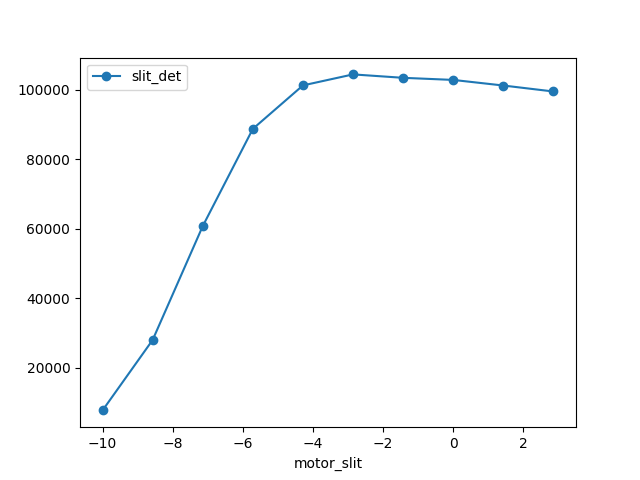

In [19]:
data[data['I'] > data['I'].quantile(0.30)].plot(x='motor_slit', y='slit_det', marker='o')

### Histogram the current

<IPython.core.display.Javascript object>


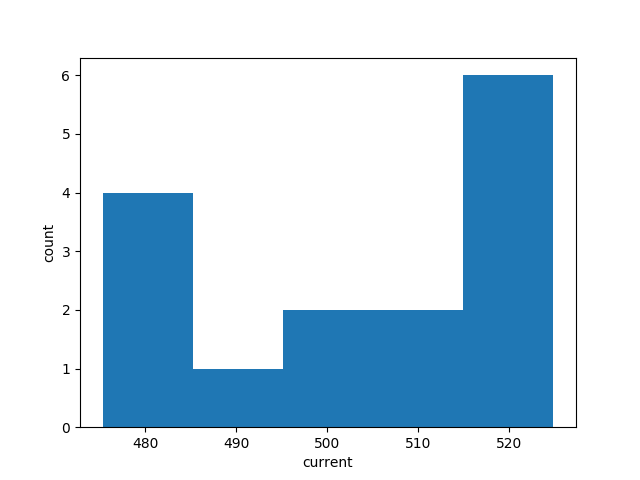

Text(0,0.5,'count')

In [20]:
plt.figure()
plt.hist(data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')

Not enough data to be interesting. Try collecting a bunch of current data by itself and then try this again.

Transient Scan ID: 177     Time: 2018/05/21 00:38:39
Persistent Unique Scan ID: 'fe6b058b-9cf9-4e69-b56e-d50c26a53cce'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+


<IPython.core.display.Javascript object>


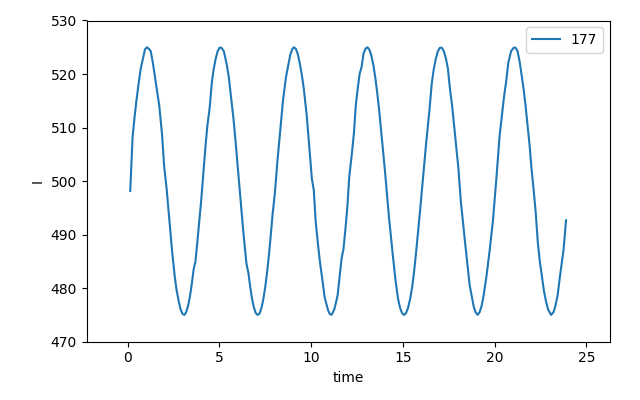

|         1 | 00:38:39.7 |        498 |
|         2 | 00:38:39.8 |        508 |
|         3 | 00:38:39.9 |        512 |
|         4 | 00:38:40.0 |        515 |
|         5 | 00:38:40.1 |        518 |
|         6 | 00:38:40.2 |        521 |
|         7 | 00:38:40.3 |        523 |
|         8 | 00:38:40.5 |        525 |
|         9 | 00:38:40.6 |        525 |
|        10 | 00:38:40.7 |        525 |
|        11 | 00:38:40.8 |        524 |
|        12 | 00:38:40.9 |        522 |
|        13 | 00:38:41.0 |        520 |
|        14 | 00:38:41.2 |        514 |
|        15 | 00:38:41.4 |        509 |
|        16 | 00:38:41.5 |        503 |
|        17 | 00:38:41.6 |        499 |
|        18 | 00:38:41.9 |        487 |
|        19 | 00:38:42.1 |        482 |
|        20 | 00:38:42.2 |        480 |
|        21 | 00:38:42.3 |        478 |
|        22 | 00:38:42.4 |        476 |
|        23 | 00:38:42.5 |        475 |
|        24 | 00:38:42.6 |        475 |
|        25 | 00:38:42.7 |        475 |


|       197 | 00:39:03.0 |        479 |
|       198 | 00:39:03.1 |        482 |
|       199 | 00:39:03.3 |        487 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       200 | 00:39:03.4 |        493 |
+-----------+------------+------------+
generator count ['fe6b058b'] (scan num: 177)





('fe6b058b-9cf9-4e69-b56e-d50c26a53cce',)

In [21]:
RE(count([I], num=200, delay=0.1))

<IPython.core.display.Javascript object>


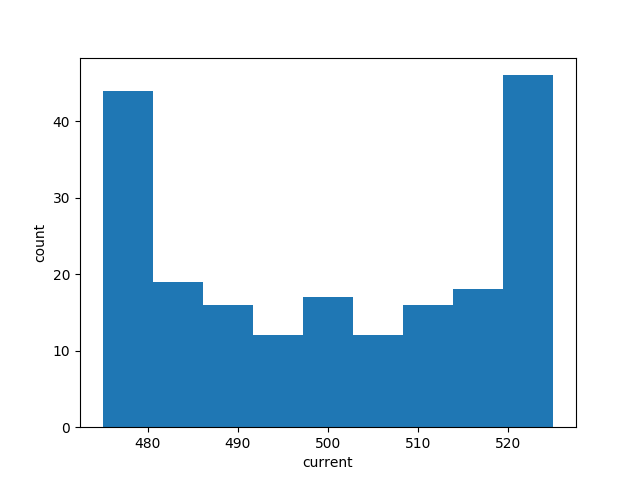

Text(0,0.5,'count')

In [22]:
more_current_data = db[-1].table()
plt.figure()
plt.hist(more_current_data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')

## Exercises

Spend some time reading [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html), and use this notebook to try some of the examples there.